Independent Project (work in progress)

In [1]:
# from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [2]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# sns.set(style = "whitegrid", 
#         color_codes = True,
#         font_scale = 1.5)

In [3]:
#stats from https://stats.wikimedia.org/#/all-projects
# English Wikipedia, over all time, granularity of 1 month

active_editors = pd.read_csv('monthly/active-editors.csv')
edited_pages = pd.read_csv('monthly/edited-pages.csv')
editors = pd.read_csv('monthly/editors.csv')
edits = pd.read_csv('monthly/edits.csv')
legacy_page_views = pd.read_csv('monthly/legacy-page-views.csv')
net_bytes_difference = pd.read_csv('monthly/net-bytes-difference.csv')
new_pages = pd.read_csv('monthly/new-pages.csv')
new_registered_users = pd.read_csv('monthly/new-registered-users.csv')
pages_to_date = pd.read_csv('monthly/pages-to-date.csv')
total_mediarequests = pd.read_csv('monthly/total-mediarequests.csv')
total_page_views = pd.read_csv('monthly/total-page-views.csv')
unique_devices = pd.read_csv('monthly/unique-devices.csv')
user_edits = pd.read_csv('monthly/user-edits.csv')

alldata = [
    active_editors,
    edited_pages,
    editors,
    edits,
    legacy_page_views,
    net_bytes_difference,
    new_pages,
    new_registered_users,
    pages_to_date,
    total_mediarequests,
    total_page_views,
    unique_devices,
    user_edits
]

alldatacounts = [
    active_editors['total.total'],
    edited_pages['total.total'],
    editors['total.total'],
    edits['total.total'],
    legacy_page_views['total.total'],
    net_bytes_difference['total.total'],
    new_pages['total.total'],
    new_registered_users['total.total'],
    pages_to_date['total.total'],
    total_mediarequests['total.total'],
    total_page_views['total.total'],
    unique_devices['total.total'],
    user_edits['total.total']
]

alldatalabels = [
    'active_editors',
    'edited_pages',
    'editors',
    'edits',
    'legacy_page_views',
    'net_bytes_difference',
    'new_pages',
    'new_registered_users',
    'pages_to_date',
    'total_mediarequests',
    'total_page_views',
    'unique_devices',
    'user_edits'
]

In [4]:
#Wikipedia size in GB
#from https://en.wikipedia.org/wiki/File:Wikipedia_article_size_in_gigabytes.png
size_data = pd.DataFrame({
    'month': ['2001-01',
             '2005-11',
             '2009-11',
             '2010-06',
             '2010-10',
              '2011-01',
              '2011-03',
              '2011-07',
              '2011-12',
              '2012-03',
              '2012-07',
              '2012-08',
              '2012-10',
              '2013-04',
              '2015-10',
              '2019-08'
             ],
    'size': [0.0,
            1.2,
            5.3,
            6.0,
            6.2,
            6.5,
            6.7,
            6.9,
            7.7,
            8.1,
            8.2,
            8.5,
            8.7,
            9.1,
            11.5,
            16.1]
})
size_data

,month,size
0,2001-01,0.0
1,2005-11,1.2
2,2009-11,5.3
3,2010-06,6.0
4,2010-10,6.2
5,2011-01,6.5
6,2011-03,6.7
7,2011-07,6.9
8,2011-12,7.7
9,2012-03,8.1


In [48]:
# Exploration
print('Data heads')
for a in range(len(alldata)):
    print(alldatalabels[a])
#     print(alldata[a].head())

Data heads
active_editors
edited_pages
editors
edits
legacy_page_views
net_bytes_difference
new_pages
new_registered_users
pages_to_date
total_mediarequests
total_page_views
unique_devices
user_edits


In [6]:
print('Data lengths')
for a in range(len(alldata)):
    print(alldatalabels[a] + ': ' + str(alldata[a].shape))

Data lengths
active_editors: (229, 4)
edited_pages: (229, 4)
editors: (229, 4)
edits: (229, 4)
legacy_page_views: (105, 4)
net_bytes_difference: (229, 4)
new_pages: (229, 4)
new_registered_users: (229, 4)
pages_to_date: (229, 4)
total_mediarequests: (8, 4)
total_page_views: (49, 4)
unique_devices: (49, 4)
user_edits: (229, 4)


In [7]:
# print('Data counts')
# for a in range(len(alldata)):
#     print(alldatalabels[a] + ': ')
#     print(alldatacounts)

In [8]:
combined_data_counts = alldata[0][['month','total.total']]
combined_data_counts.rename(columns = {"month":"month", "total.total":"active_editors"}, inplace = True)
combined_data_counts.head()

C:\Users\Ash\Anaconda3\lib\site-packages\pandas\core\frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,month,active_editors
0,2001-01-01T00:00:00.000Z,16
1,2001-02-01T00:00:00.000Z,25
2,2001-03-01T00:00:00.000Z,47
3,2001-04-01T00:00:00.000Z,32
4,2001-05-01T00:00:00.000Z,40


In [9]:
for i in range(len(alldata)-1):
    combined_data_counts[alldatalabels[i+1]] = alldatacounts[i+1]

C:\Users\Ash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
combined_data_counts['month'] = combined_data_counts['month'].str[:7]
combined_data_counts = combined_data_counts.dropna(axis='columns')
# combined_data_counts['month'] = combined_data_counts['month'].replace('-','.', inplace = True)
# combined_data_counts.values = combined_data_counts.values.astype(float)
combined_data_counts['Non-User Edits'] = combined_data_counts['edits'] - combined_data_counts['user_edits']
combined_data_counts['Total Pages Added to Date'] = combined_data_counts['new_pages'].cumsum()
combined_data_counts['Total Removed Pages to Date'] = combined_data_counts['Total Pages Added to Date']-combined_data_counts['pages_to_date']

combined_data_counts.head()

,month,active_editors,edited_pages,editors,edits,net_bytes_difference,new_pages,new_registered_users,pages_to_date,user_edits,Non-User Edits,Total Pages Added to Date,Total Removed Pages to Date
0,2001-01,16,57,84,408,235261,57,5,57,322,86,57,0
1,2001-02,25,161,61,816,77654,153,2,210,673,143,210,0
2,2001-03,47,560,154,1570,-3376152,506,7,716,1170,400,716,0
3,2001-04,32,634,98,1083,-1222288,608,0,1324,875,208,1324,0
4,2001-05,40,1381,126,2134,-11115721,1281,8,2605,1831,303,2605,0


In [11]:
df = combined_data_counts
df['net_bytes_difference'] = df['net_bytes_difference'].divide(other=1073741824)
df.rename(columns = {
    'month' : 'Month',
    'active_editors' : 'Active Editors',
    'edited_pages' : 'Edited Pages',
    'editors' : 'Editors',
    'edits' : 'Edits',
    'net_bytes_difference': 'Net Size Difference (Gigabytes)',
    'new_pages' : 'New Pages',
    'new_registered_users' : 'New Registered Users',
    'pages_to_date' : 'Total Pages to Date',
    'user_edits' : 'User Edits'}, inplace=True)

In [12]:
df['Net Size Difference (Gigabytes)'] = df['Net Size Difference (Gigabytes)']*1000000
df.rename(columns = {
    'Net Size Difference (Gigabytes)':'Net Size Difference (Kilobytes)'}, inplace=True)

In [13]:
# combined_data_counts['month'] = combined_data_counts['month'].replace('-','.', inplace = True)
# # combined_data_counts.values = combined_data_counts.values.astype(float)
# combined_data_counts.head()

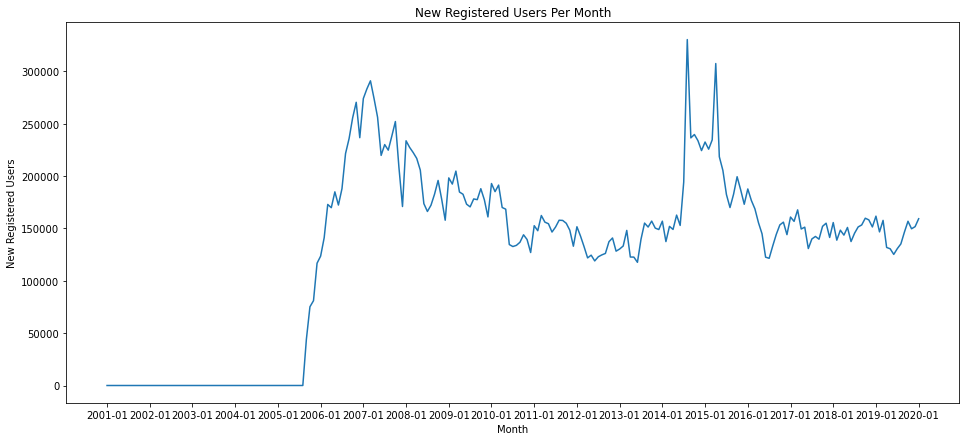

In [14]:
plt.figure(figsize=(16,7))
ax = sns.lineplot(x='Month', y='New Registered Users',data=df)
ax.set(xticks=df['Month'][::12].replace('-','.', inplace = False))
ax.set_title('New Registered Users Per Month')
plt.show()

In [15]:
# def cumulate(data, label):
#     df = data.copy()
#     for i+1 in range(df.size-1):
#         df[label].iloc[i-1:i] = df[label].iloc[i-1]+df[label].iloc[i]

# def cumulate(data, label):
#     df = data.copy()
#     for i in range(df[label].size-1):
#         df[label].iloc[i+1:i+2] = df[label].iloc[i]+df[label].iloc[i+1]
#     return df

# cumulative = cumulate(df, 'Net Size Difference (Gigabytes)')
# cumulative = cumulate(cumulative, 'Edited Pages')
# cumulative = cumulate(cumulative, 'Edits')
# cumulative = cumulate(cumulative, 'New Registered Users')
# cumulative = cumulate(cumulative, 'User Edits')
# cumulative = cumulate(cumulative, 'Non-User Edits')       

In [16]:
cumulative = df.copy()
cumulative['Edited Pages'] = cumulative['Edited Pages'].cumsum()
cumulative['Edits'] = cumulative['Edits'].cumsum()
cumulative['New Registered Users'] = cumulative['New Registered Users'].cumsum()
cumulative['User Edits'] = cumulative['User Edits'].cumsum()
cumulative['Net Size Difference (Kilobytes)'] = cumulative['Net Size Difference (Kilobytes)'].cumsum()
cumulative['Non-User Edits'] = cumulative['Non-User Edits'].cumsum()
cumulative.head()

,Month,Active Editors,Edited Pages,Editors,Edits,Net Size Difference (Kilobytes),New Pages,New Registered Users,Total Pages to Date,User Edits,Non-User Edits,Total Pages Added to Date,Total Removed Pages to Date
0,2001-01,16,57,84,408,219.103880,57,5,57,322,86,57,0
1,2001-02,25,218,61,1224,291.424803,153,7,210,995,229,210,0
2,2001-03,47,778,154,2794,-2852.861769,506,14,716,2165,629,716,0
3,2001-04,32,1412,98,3877,-3991.206177,608,14,1324,3040,837,1324,0
4,2001-05,40,2793,126,6011,-14343.528077,1281,22,2605,4871,1140,2605,0


In [17]:
cumulative.rename(columns = {
    'Edited Pages' : 'Edited Pages, Cumulative',
    'Edits' : 'Edits, Cumulative',
    'Net Size Difference (Kilobytes)': 'Net Size Difference (Kilobytes), Cumulative',
    'New Registered Users' : 'Registered Users, Cumulative',
    'User Edits' : 'User Edits, Cumulative'}, inplace=True)

cumulative.head()

,Month,Active Editors,"Edited Pages, Cumulative",Editors,"Edits, Cumulative","Net Size Difference (Kilobytes), Cumulative",New Pages,"Registered Users, Cumulative",Total Pages to Date,"User Edits, Cumulative",Non-User Edits,Total Pages Added to Date,Total Removed Pages to Date
0,2001-01,16,57,84,408,219.103880,57,5,57,322,86,57,0
1,2001-02,25,218,61,1224,291.424803,153,7,210,995,229,210,0
2,2001-03,47,778,154,2794,-2852.861769,506,14,716,2165,629,716,0
3,2001-04,32,1412,98,3877,-3991.206177,608,14,1324,3040,837,1324,0
4,2001-05,40,2793,126,6011,-14343.528077,1281,22,2605,4871,1140,2605,0


In [18]:
df.head()

,Month,Active Editors,Edited Pages,Editors,Edits,Net Size Difference (Kilobytes),New Pages,New Registered Users,Total Pages to Date,User Edits,Non-User Edits,Total Pages Added to Date,Total Removed Pages to Date
0,2001-01,16,57,84,408,219.103880,57,5,57,322,86,57,0
1,2001-02,25,161,61,816,72.320923,153,2,210,673,143,210,0
2,2001-03,47,560,154,1570,-3144.286573,506,7,716,1170,400,716,0
3,2001-04,32,634,98,1083,-1138.344407,608,0,1324,875,208,1324,0
4,2001-05,40,1381,126,2134,-10352.321900,1281,8,2605,1831,303,2605,0


In [19]:
pd.melt(df[['Month','Active Editors', 'Edited Pages', 'User Edits', 'New Pages']], ['Month'])

,Month,variable,value
0,2001-01,Active Editors,16
1,2001-02,Active Editors,25
2,2001-03,Active Editors,47
3,2001-04,Active Editors,32
4,2001-05,Active Editors,40
...,...,...,...
911,2019-09,New Pages,209761
912,2019-10,New Pages,215216
913,2019-11,New Pages,193525
914,2019-12,New Pages,171296


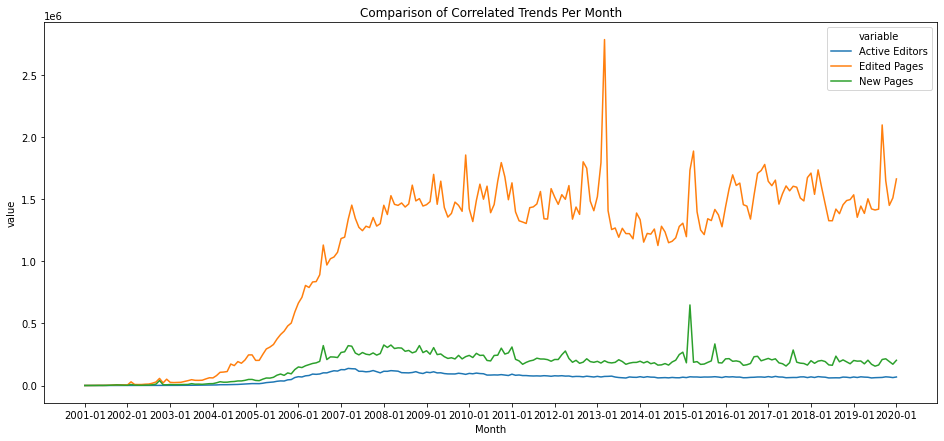

In [20]:
plt.figure(figsize=(16,7))
ax = sns.lineplot(x='Month', y='value', hue = 'variable', data=pd.melt(df[['Month',
                                                                           'Active Editors', 
                                                                           'Edited Pages',
                                                                           'New Pages']], ['Month']))
ax.set(xticks=df['Month'][::12].replace('-','.', inplace = False))
ax.set_title('Comparison of Correlated Trends Per Month')
plt.savefig('comp1.png')
plt.show()

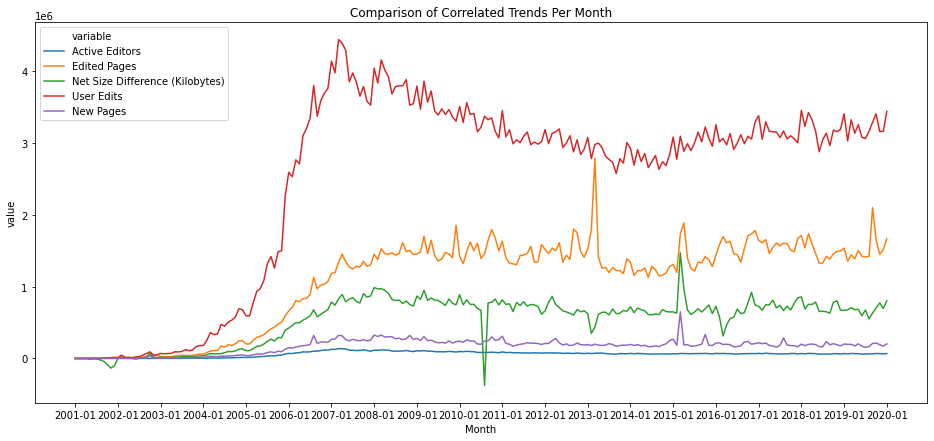

In [21]:
plt.figure(figsize=(16,7))
ax = sns.lineplot(x='Month', y='value', hue = 'variable', data=pd.melt(df[['Month',
                                                                           'Active Editors', 
                                                                           'Edited Pages',
                                                                           'Net Size Difference (Kilobytes)',
                                                                           'User Edits', 
                                                                           'New Pages']], ['Month']))
ax.set(xticks=df['Month'][::12].replace('-','.', inplace = False))
ax.set_title('Comparison of Correlated Trends Per Month')
plt.savefig('comp2.png')
plt.show()

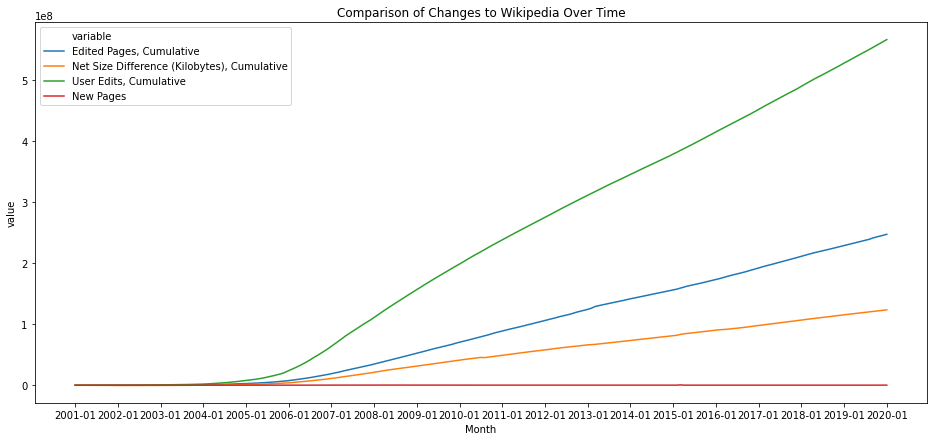

In [22]:
plt.figure(figsize=(16,7))
ax = sns.lineplot(x='Month', y='value', hue = 'variable', data=pd.melt(cumulative[['Month',
                                                                           'Edited Pages, Cumulative',
                                                                           'Net Size Difference (Kilobytes), Cumulative',
                                                                           'User Edits, Cumulative', 
                                                                           'New Pages']], ['Month']))
ax.set(xticks=df['Month'][::12].replace('-','.', inplace = False))
ax.set_title('Comparison of Changes to Wikipedia Over Time')
plt.savefig('cumcomp.png')
plt.show()

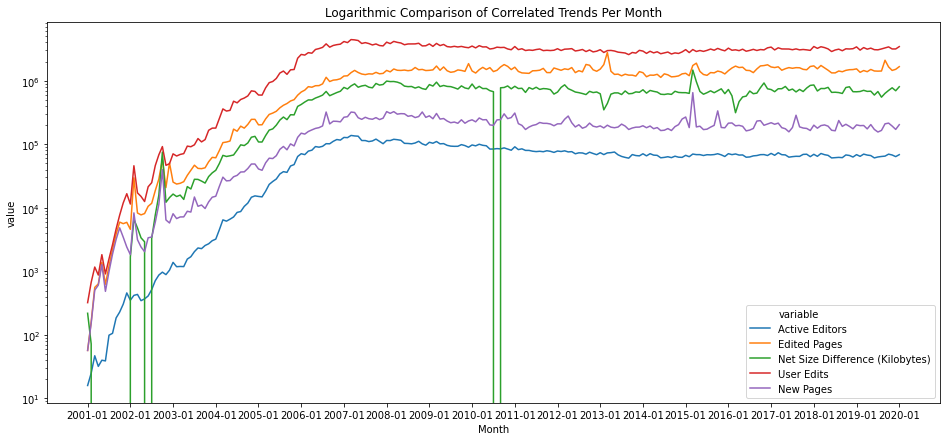

In [23]:
plt.figure(figsize=(16,7))
ax = sns.lineplot(x='Month', y='value', hue = 'variable', data=pd.melt(df[['Month',
                                                                           'Active Editors', 
                                                                           'Edited Pages',
                                                                           'Net Size Difference (Kilobytes)',
                                                                           'User Edits', 
                                                                           'New Pages']], ['Month']))
ax.set(xticks=df['Month'][::12].replace('-','.', inplace = False))
ax.set_yscale('log')
ax.set_title('Logarithmic Comparison of Correlated Trends Per Month')
plt.savefig('logcomp.png')
plt.show()

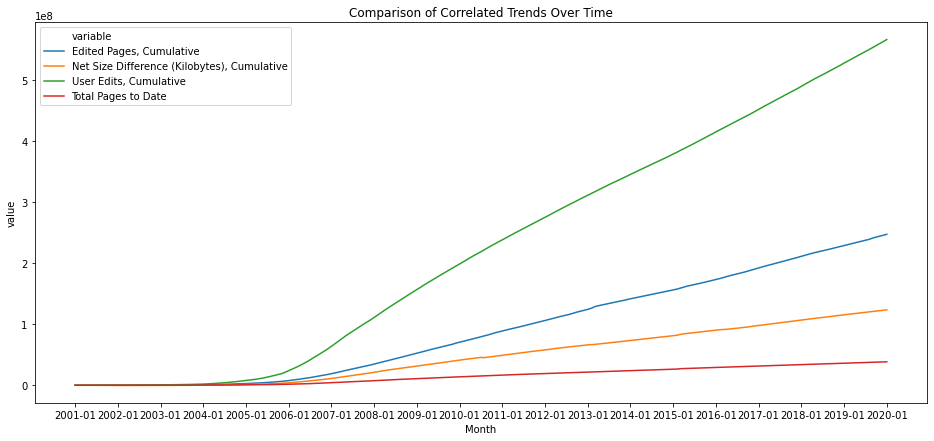

In [24]:
plt.figure(figsize=(16,7))
ax = sns.lineplot(x='Month', y='value', hue = 'variable', data=pd.melt(cumulative[['Month',
                                                                           'Edited Pages, Cumulative',
                                                                           'Net Size Difference (Kilobytes), Cumulative',
                                                                           'User Edits, Cumulative', 
                                                                           'Total Pages to Date']], ['Month']))
ax.set(xticks=df['Month'][::12].replace('-','.', inplace = False))
ax.set_title('Comparison of Correlated Trends Over Time')
plt.show()

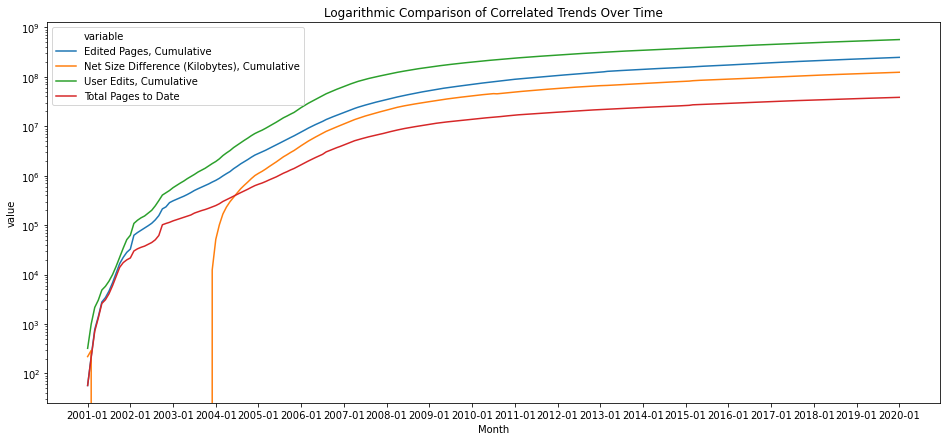

In [25]:
plt.figure(figsize=(16,7))
ax = sns.lineplot(x='Month', y='value', hue = 'variable', data=pd.melt(cumulative[['Month',
                                                                           'Edited Pages, Cumulative',
                                                                           'Net Size Difference (Kilobytes), Cumulative',
                                                                           'User Edits, Cumulative', 
                                                                           'Total Pages to Date']], ['Month']))
ax.set(xticks=df['Month'][::12].replace('-','.', inplace = False))
ax.set_yscale('log')
ax.set_title('Logarithmic Comparison of Correlated Trends Over Time')
plt.savefig('cumcomp.png')
plt.show()

In [26]:
# plt.figure(figsize=(16,7))
# ax = sns.lineplot(x='Month', y='Net Size Difference (Gigabytes)',data=df)
# ax.set(xticks=df['Month'][::12].replace('-','.', inplace = False))
# ax.set_title('Net Change in Bytes Per Month')
# plt.show()

In [27]:
# plt.figure(figsize=(16,7))
# ax = sns.lineplot(x='Month', y='Net Size Difference (Gigabytes), Cumulative',data=cumulative)
# ax.set(xticks=df['Month'][::12].replace('-','.', inplace = False))
# ax.set_title('Size of Wikipedia (In Bytes) Over Time')
# plt.show()

In [28]:
# plt.figure(figsize=(16,7))
# ax = sns.lineplot(x='Month', y='New Pages',data=df)
# ax.set(xticks=df['Month'][::12].replace('-','.', inplace = False))
# ax.set_title('New Pages Per Month')
# plt.show()

In [29]:
# plt.figure(figsize=(16,7))
# ax = sns.lineplot(x='Month', y='Total Pages to Date',data=cumulative)
# ax.set(xticks=df['Month'][::12].replace('-','.', inplace = False))
# ax.set_title('Number of Pages Added to Wikipedia Over Time')
# plt.ticklabel_format(style='plain', axis='y')
# plt.show()

In [30]:
# plt.figure(figsize=(16,7))
# ax = sns.lineplot(x='Net Size Difference (Gigabytes, Cumulative)', y='Total Pages to Date',data=cumulative)
# ax.set_title('Ratio of Gigabytes Versus Number of Pages')
# plt.show()

In [31]:
# # pagesizeSeries = cumulative['Total Pages to Date'].divide(cumulative['Net Size Difference (Gigabytes, Cumulative)'])
# pagesizeSeries = cumulative['Net Size Difference (Gigabytes, Cumulative)'].divide(cumulative['Total Pages to Date'])

# avgpagesize = pagesizeSeries.mean()
# pagesizesd = pagesizeSeries.std()
# print('Average Wikipedia Page Size in Gb: ' + str(avgpagesize))
# print('Standard Deviation of Wikipedia Page Size: ' + str(pagesizesd))

In [32]:
# plt.figure(figsize=(14, 8))
# ax = sns.distplot(pagesizeSeries)
# ax.set_title('Distribution of Ratio of Gigabytes Versus Number of Pages')
# plt.show()

In [33]:
cumulative.head()

,Month,Active Editors,"Edited Pages, Cumulative",Editors,"Edits, Cumulative","Net Size Difference (Kilobytes), Cumulative",New Pages,"Registered Users, Cumulative",Total Pages to Date,"User Edits, Cumulative",Non-User Edits,Total Pages Added to Date,Total Removed Pages to Date
0,2001-01,16,57,84,408,219.103880,57,5,57,322,86,57,0
1,2001-02,25,218,61,1224,291.424803,153,7,210,995,229,210,0
2,2001-03,47,778,154,2794,-2852.861769,506,14,716,2165,629,716,0
3,2001-04,32,1412,98,3877,-3991.206177,608,14,1324,3040,837,1324,0
4,2001-05,40,2793,126,6011,-14343.528077,1281,22,2605,4871,1140,2605,0


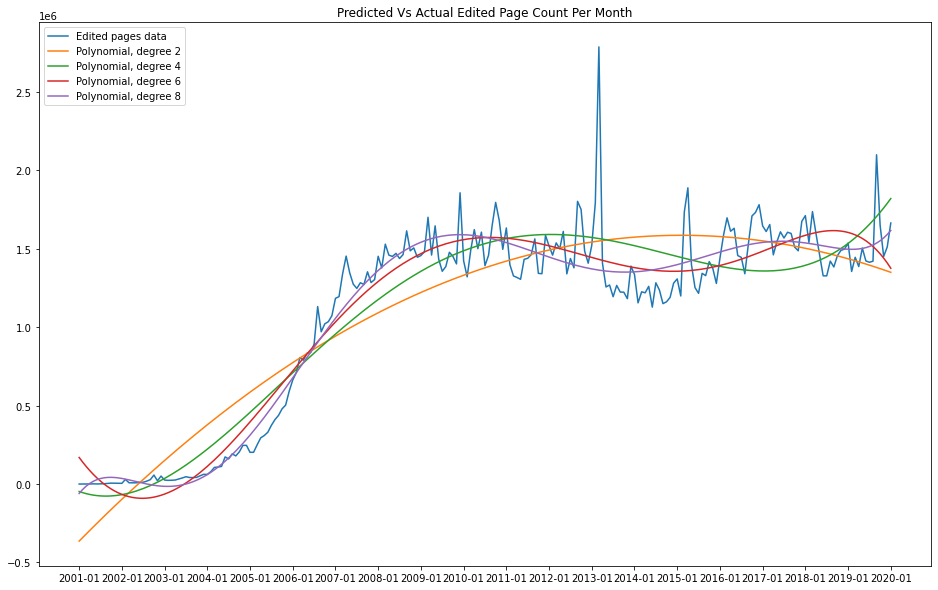

In [37]:
datarray = df['Edited Pages'].to_numpy()
x = np.linspace(0, len(datarray)-1, num=len(datarray))
x_new = np.linspace(x[0], x[-1], num=len(x))
fig1 = plt.figure(figsize=(16,10))  

import numpy.polynomial.polynomial as poly

coefs1 = poly.polyfit(x, datarray, 1)
ffit1 = poly.polyval(x_new, coefs1)
coefs2 = poly.polyfit(x, datarray, 2)
ffit2 = poly.polyval(x_new, coefs2)
coefs3 = poly.polyfit(x, datarray, 3)
ffit3 = poly.polyval(x_new, coefs3)
coefs4 = poly.polyfit(x, datarray, 4)
ffit4 = poly.polyval(x_new, coefs4)
coefs5 = poly.polyfit(x, datarray, 5)
ffit5 = poly.polyval(x_new, coefs5)
coefs6 = poly.polyfit(x, datarray, 6)
ffit6 = poly.polyval(x_new, coefs6)
coefs8 = poly.polyfit(x, datarray, 8)
ffit8 = poly.polyval(x_new, coefs8)


ax1 = fig1.add_subplot(111)                                                                                   
ax1.plot(df['Month'], datarray,label="Edited pages data")                                                                     
# ax1.plot(df['Month'], ffit1, label="Polynomial, degree 1")
ax1.plot(df['Month'], ffit2, label="Polynomial, degree 2")
# ax1.plot(df['Month'], ffit3, label="Polynomial, degree 3")
ax1.plot(df['Month'], ffit4, label="Polynomial, degree 4")
# ax1.plot(df['Month'], ffit5, label="Polynomial, degree 5")
ax1.plot(df['Month'], ffit6, label="Polynomial, degree 6")
ax1.plot(df['Month'], ffit8, label="Polynomial, degree 8")


ax1.set_title('Predicted Vs Actual Edited Page Count Per Month')
ax1.set(xticks=df['Month'][::12].replace('-','.', inplace = False))

plt.legend(loc="upper left")
plt.savefig('1.png')

plt.show()

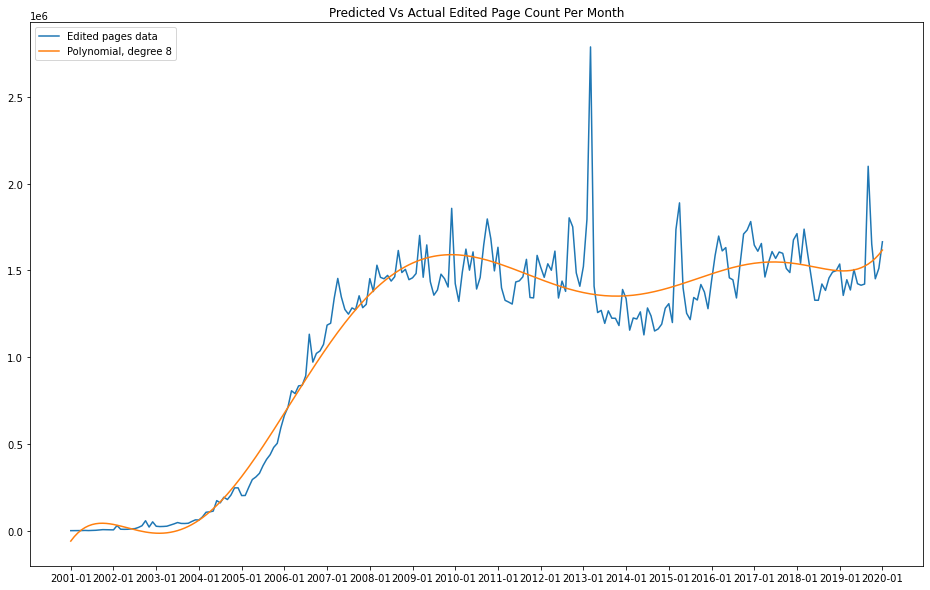

In [38]:
datarray = df['Edited Pages'].to_numpy()
x = np.linspace(0, len(datarray)-1, num=len(datarray))
# x_new = np.linspace(x[0], x[-1], num=len(x)*10)
x_new = np.linspace(x[0], x[-1], num=len(x))

fig1 = plt.figure(figsize=(16,10))  

import numpy.polynomial.polynomial as poly

coefs = poly.polyfit(x, datarray, 8)
ffit = poly.polyval(x_new, coefs)

ax1 = fig1.add_subplot(111)                                                                                   
ax1.plot(df['Month'], datarray,label="Edited pages data")                                                                     
ax1.plot(df['Month'], ffit, label="Polynomial, degree 8")
ax1.set(xticks=df['Month'][::12].replace('-','.', inplace = False))
ax1.set_title('Predicted Vs Actual Edited Page Count Per Month')
plt.legend(loc="upper left")
plt.savefig('2.png')
plt.show()


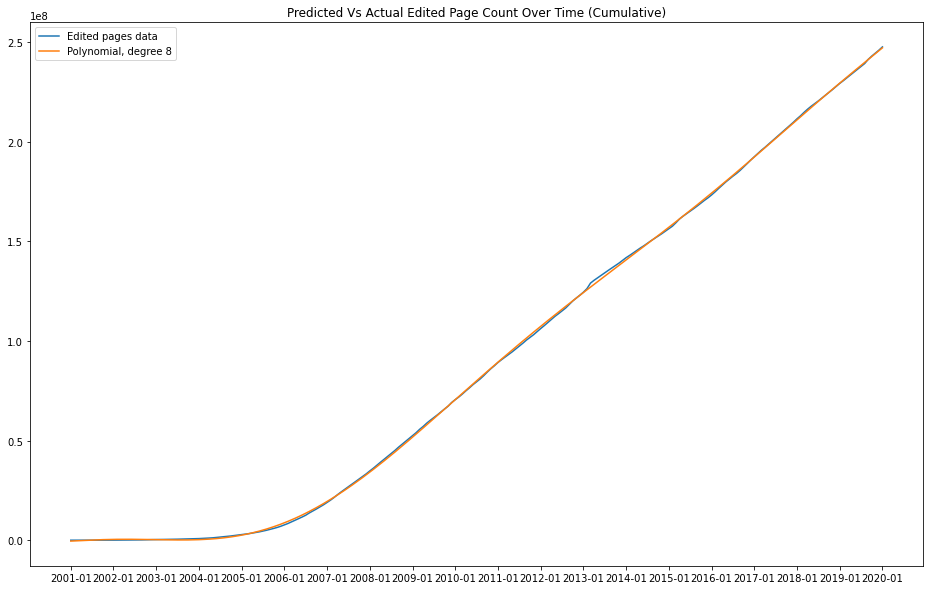

In [39]:
datarray = cumulative['Edited Pages, Cumulative'].to_numpy()
x = np.linspace(0, len(datarray)-1, num=len(datarray))
x_new = np.linspace(x[0], x[-1], num=len(x))
fig1 = plt.figure(figsize=(16,10))  

coefs6 = poly.polyfit(x, datarray, 6)
ffit6 = poly.polyval(x_new, coefs6)
coefs8 = poly.polyfit(x, datarray, 8)
ffit8 = poly.polyval(x_new, coefs8)


ax1 = fig1.add_subplot(111)                                                                                   
ax1.plot(df['Month'], datarray,label="Edited pages data")                                                                     
# ax1.plot(df['Month'], ffit1, label="Polynomial, degree 1")

ax1.plot(df['Month'], ffit8, label="Polynomial, degree 8")


ax1.set_title('Predicted Vs Actual Edited Page Count Over Time (Cumulative)')
ax1.set(xticks=df['Month'][::12].replace('-','.', inplace = False))

plt.legend(loc="upper left")
plt.savefig('3.png')

plt.show()

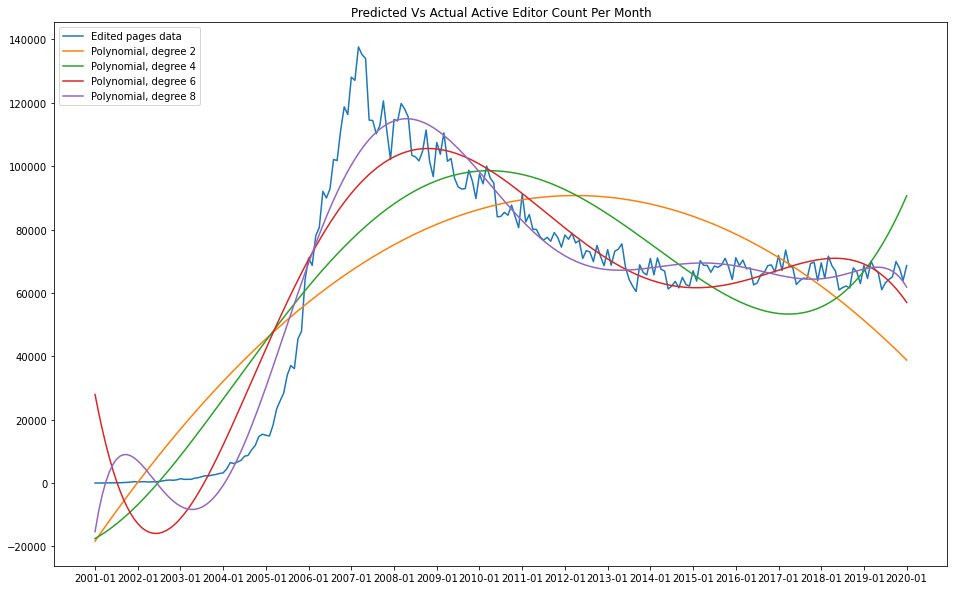

In [40]:
datarray = df['Active Editors'].to_numpy()
x = np.linspace(0, len(datarray)-1, num=len(datarray))
x_new = np.linspace(x[0], x[-1], num=len(x))
fig1 = plt.figure(figsize=(16,10))  

import numpy.polynomial.polynomial as poly

coefs1 = poly.polyfit(x, datarray, 1)
ffit1 = poly.polyval(x_new, coefs1)
coefs2 = poly.polyfit(x, datarray, 2)
ffit2 = poly.polyval(x_new, coefs2)
coefs3 = poly.polyfit(x, datarray, 3)
ffit3 = poly.polyval(x_new, coefs3)
coefs4 = poly.polyfit(x, datarray, 4)
ffit4 = poly.polyval(x_new, coefs4)
coefs5 = poly.polyfit(x, datarray, 5)
ffit5 = poly.polyval(x_new, coefs5)
coefs6 = poly.polyfit(x, datarray, 6)
ffit6 = poly.polyval(x_new, coefs6)
coefs8 = poly.polyfit(x, datarray, 8)
ffit8 = poly.polyval(x_new, coefs8)


ax1 = fig1.add_subplot(111)                                                                                   
ax1.plot(df['Month'], datarray,label="Edited pages data")                                                                     
# ax1.plot(df['Month'], ffit1, label="Polynomial, degree 1")
ax1.plot(df['Month'], ffit2, label="Polynomial, degree 2")
# ax1.plot(df['Month'], ffit3, label="Polynomial, degree 3")
ax1.plot(df['Month'], ffit4, label="Polynomial, degree 4")
# ax1.plot(df['Month'], ffit5, label="Polynomial, degree 5")
ax1.plot(df['Month'], ffit6, label="Polynomial, degree 6")
ax1.plot(df['Month'], ffit8, label="Polynomial, degree 8")


ax1.set_title('Predicted Vs Actual Active Editor Count Per Month')
ax1.set(xticks=df['Month'][::12].replace('-','.', inplace = False))

plt.legend(loc="upper left")
plt.savefig('4.png')

plt.show()

In [41]:
df.head()

,Month,Active Editors,Edited Pages,Editors,Edits,Net Size Difference (Kilobytes),New Pages,New Registered Users,Total Pages to Date,User Edits,Non-User Edits,Total Pages Added to Date,Total Removed Pages to Date
0,2001-01,16,57,84,408,219.103880,57,5,57,322,86,57,0
1,2001-02,25,161,61,816,72.320923,153,2,210,673,143,210,0
2,2001-03,47,560,154,1570,-3144.286573,506,7,716,1170,400,716,0
3,2001-04,32,634,98,1083,-1138.344407,608,0,1324,875,208,1324,0
4,2001-05,40,1381,126,2134,-10352.321900,1281,8,2605,1831,303,2605,0


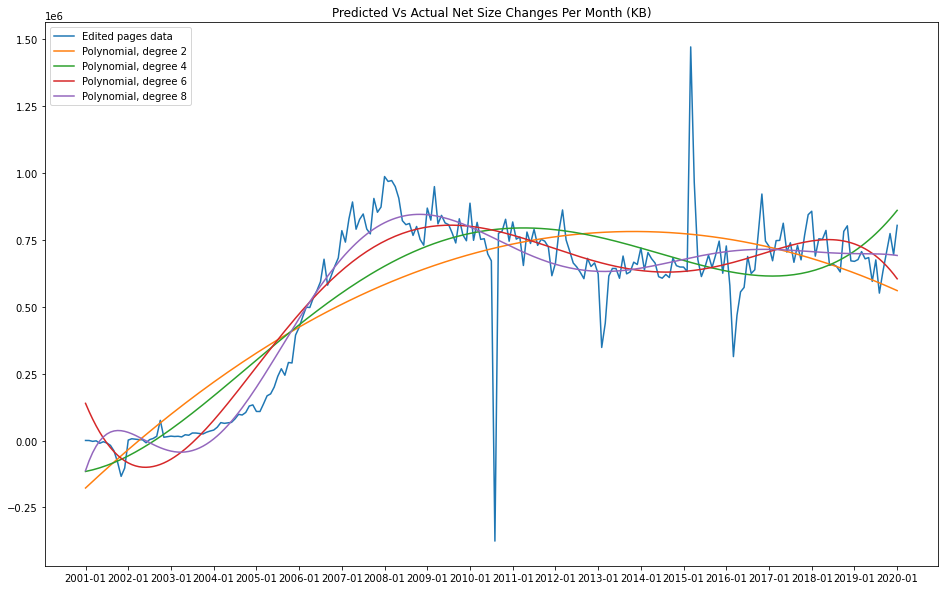

In [42]:
datarray = df['Net Size Difference (Kilobytes)'].to_numpy()
x = np.linspace(0, len(datarray)-1, num=len(datarray))
x_new = np.linspace(x[0], x[-1], num=len(x))
fig1 = plt.figure(figsize=(16,10))  

import numpy.polynomial.polynomial as poly

coefs1 = poly.polyfit(x, datarray, 1)
ffit1 = poly.polyval(x_new, coefs1)
coefs2 = poly.polyfit(x, datarray, 2)
ffit2 = poly.polyval(x_new, coefs2)
coefs3 = poly.polyfit(x, datarray, 3)
ffit3 = poly.polyval(x_new, coefs3)
coefs4 = poly.polyfit(x, datarray, 4)
ffit4 = poly.polyval(x_new, coefs4)
coefs5 = poly.polyfit(x, datarray, 5)
ffit5 = poly.polyval(x_new, coefs5)
coefs6 = poly.polyfit(x, datarray, 6)
ffit6 = poly.polyval(x_new, coefs6)
coefs8 = poly.polyfit(x, datarray, 8)
ffit8 = poly.polyval(x_new, coefs8)


ax1 = fig1.add_subplot(111)                                                                                   
ax1.plot(df['Month'], datarray,label="Edited pages data")                                                                     
# ax1.plot(df['Month'], ffit1, label="Polynomial, degree 1")
ax1.plot(df['Month'], ffit2, label="Polynomial, degree 2")
ax1.plot(df['Month'], ffit4, label="Polynomial, degree 4")
ax1.plot(df['Month'], ffit6, label="Polynomial, degree 6")
ax1.plot(df['Month'], ffit8, label="Polynomial, degree 8")


ax1.set_title('Predicted Vs Actual Net Size Changes Per Month (KB)')
ax1.set(xticks=df['Month'][::12].replace('-','.', inplace = False))

plt.legend(loc="upper left")
plt.savefig('5.png')

plt.show()

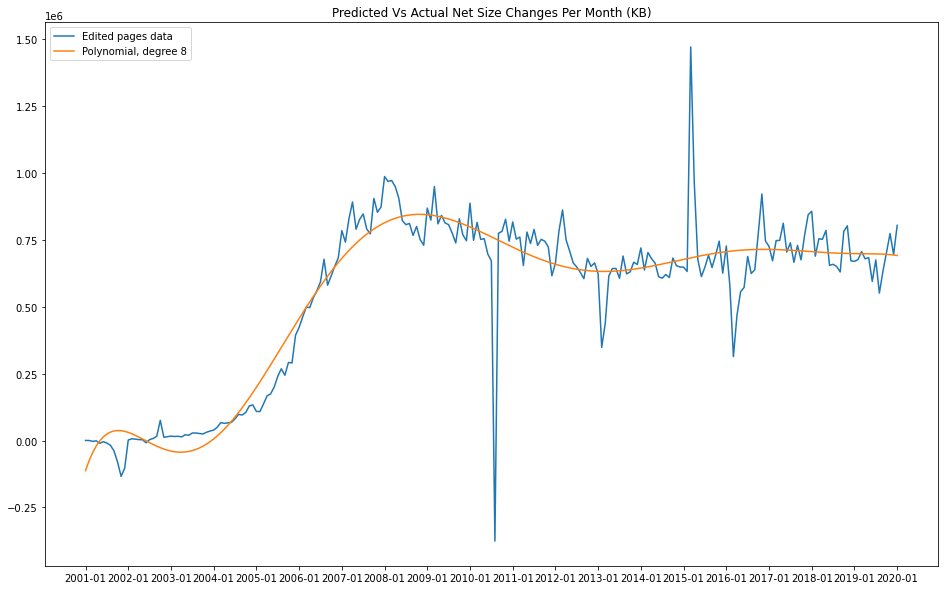

In [43]:

fig1 = plt.figure(figsize=(16,10))  


ax1 = fig1.add_subplot(111)                                                                                   
ax1.plot(df['Month'], datarray,label="Edited pages data")                                                                     

ax1.plot(df['Month'], ffit8, label="Polynomial, degree 8")


ax1.set_title('Predicted Vs Actual Net Size Changes Per Month (KB)')
ax1.set(xticks=df['Month'][::12].replace('-','.', inplace = False))

plt.legend(loc="upper left")
plt.savefig('6.png')

plt.show()

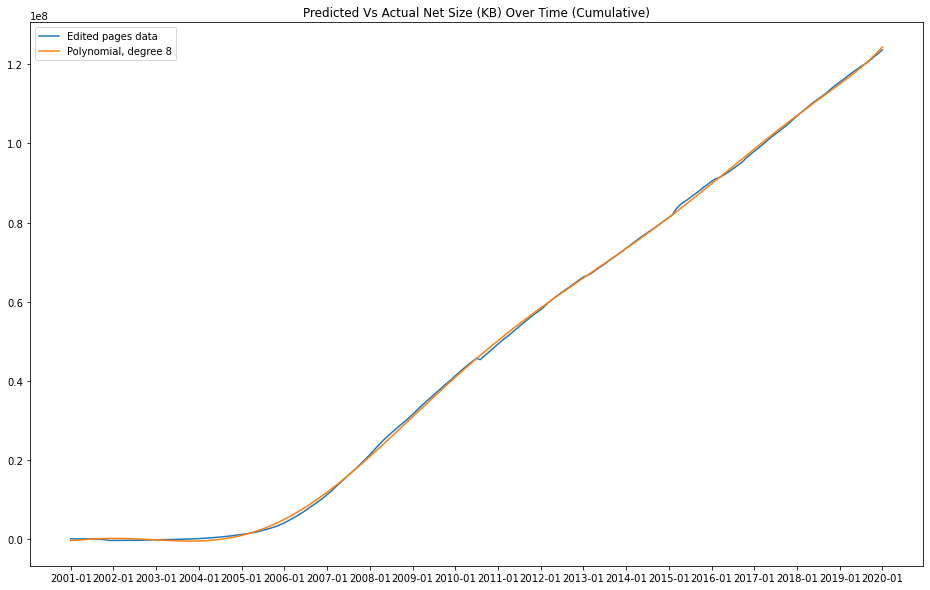

In [44]:
datarray = cumulative['Net Size Difference (Kilobytes), Cumulative'].to_numpy()
x = np.linspace(0, len(datarray)-1, num=len(datarray))
x_new = np.linspace(x[0], x[-1], num=len(x))
fig1 = plt.figure(figsize=(16,10))  

import numpy.polynomial.polynomial as poly

coefs1 = poly.polyfit(x, datarray, 1)
ffit1 = poly.polyval(x_new, coefs1)
coefs2 = poly.polyfit(x, datarray, 2)
ffit2 = poly.polyval(x_new, coefs2)
coefs3 = poly.polyfit(x, datarray, 3)
ffit3 = poly.polyval(x_new, coefs3)
coefs4 = poly.polyfit(x, datarray, 4)
ffit4 = poly.polyval(x_new, coefs4)
coefs5 = poly.polyfit(x, datarray, 5)
ffit5 = poly.polyval(x_new, coefs5)
coefs6 = poly.polyfit(x, datarray, 6)
ffit6 = poly.polyval(x_new, coefs6)
coefs8 = poly.polyfit(x, datarray, 8)
ffit8 = poly.polyval(x_new, coefs8)


ax1 = fig1.add_subplot(111)                                                                                   
ax1.plot(df['Month'], datarray,label="Edited pages data")                                                                     
# ax1.plot(df['Month'], ffit1, label="Polynomial, degree 1")
ax1.plot(df['Month'], ffit8, label="Polynomial, degree 8")
# ax1.plot(df['Month'], ffit3, label="Polynomial, degree 3")
# ax1.plot(df['Month'], ffit4, label="Polynomial, degree 4")
# # ax1.plot(df['Month'], ffit5, label="Polynomial, degree 5")
# ax1.plot(df['Month'], ffit6, label="Polynomial, degree 6")
# ax1.plot(df['Month'], ffit8, label="Polynomial, degree 8")


ax1.set_title('Predicted Vs Actual Net Size (KB) Over Time (Cumulative)')
ax1.set(xticks=df['Month'][::12].replace('-','.', inplace = False))

plt.legend(loc="upper left")
plt.savefig('7.png')

plt.show()

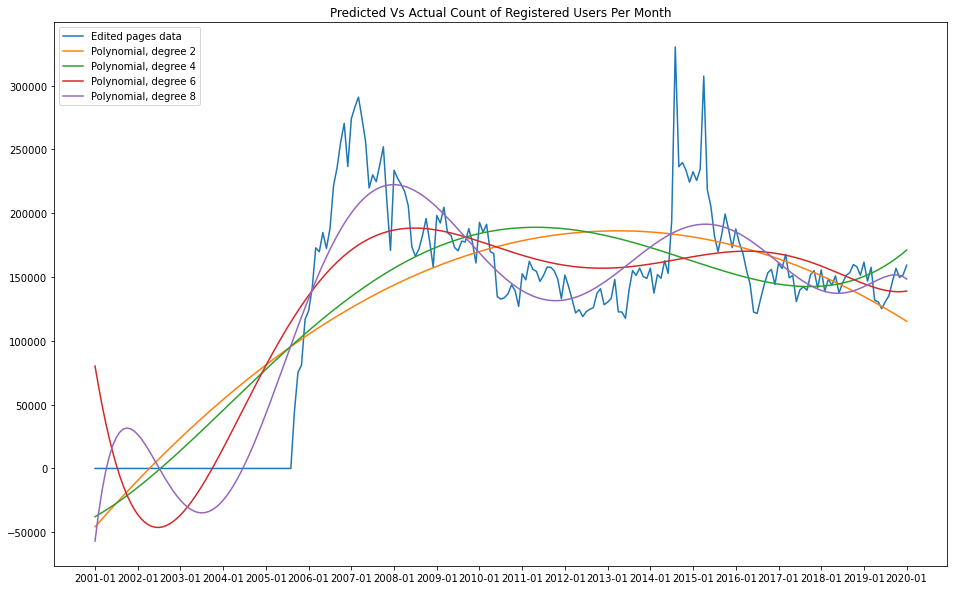

In [45]:
datarray = df['New Registered Users'].to_numpy()
x = np.linspace(0, len(datarray)-1, num=len(datarray))
x_new = np.linspace(x[0], x[-1], num=len(x))
fig1 = plt.figure(figsize=(16,10))  

import numpy.polynomial.polynomial as poly

coefs1 = poly.polyfit(x, datarray, 1)
ffit1 = poly.polyval(x_new, coefs1)
coefs2 = poly.polyfit(x, datarray, 2)
ffit2 = poly.polyval(x_new, coefs2)
coefs3 = poly.polyfit(x, datarray, 3)
ffit3 = poly.polyval(x_new, coefs3)
coefs4 = poly.polyfit(x, datarray, 4)
ffit4 = poly.polyval(x_new, coefs4)
coefs5 = poly.polyfit(x, datarray, 5)
ffit5 = poly.polyval(x_new, coefs5)
coefs6 = poly.polyfit(x, datarray, 6)
ffit6 = poly.polyval(x_new, coefs6)
coefs8 = poly.polyfit(x, datarray, 8)
ffit8 = poly.polyval(x_new, coefs8)


ax1 = fig1.add_subplot(111)                                                                                   
ax1.plot(df['Month'], datarray,label="Edited pages data")                                                                     
# ax1.plot(df['Month'], ffit1, label="Polynomial, degree 1")
ax1.plot(df['Month'], ffit2, label="Polynomial, degree 2")
# ax1.plot(df['Month'], ffit3, label="Polynomial, degree 3")
ax1.plot(df['Month'], ffit4, label="Polynomial, degree 4")
# ax1.plot(df['Month'], ffit5, label="Polynomial, degree 5")
ax1.plot(df['Month'], ffit6, label="Polynomial, degree 6")
ax1.plot(df['Month'], ffit8, label="Polynomial, degree 8")


ax1.set_title('Predicted Vs Actual Count of Registered Users Per Month')
ax1.set(xticks=df['Month'][::12].replace('-','.', inplace = False))

plt.legend(loc="upper left")
plt.savefig('8.png')

plt.show()

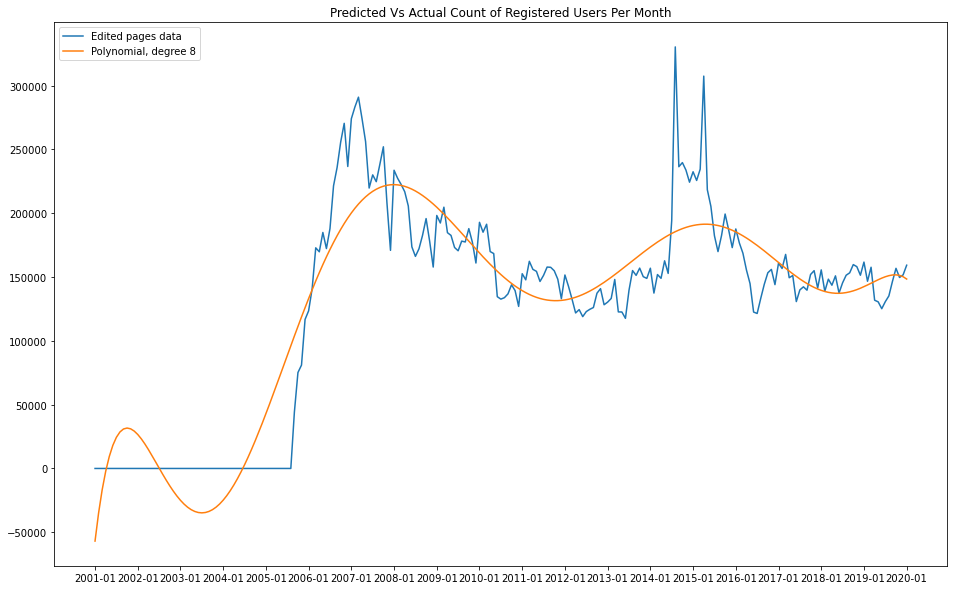

In [46]:
datarray = df['New Registered Users'].to_numpy()
x = np.linspace(0, len(datarray)-1, num=len(datarray))
x_new = np.linspace(x[0], x[-1], num=len(x))
fig1 = plt.figure(figsize=(16,10))  

import numpy.polynomial.polynomial as poly

coefs1 = poly.polyfit(x, datarray, 1)
ffit1 = poly.polyval(x_new, coefs1)
coefs2 = poly.polyfit(x, datarray, 2)
ffit2 = poly.polyval(x_new, coefs2)
coefs3 = poly.polyfit(x, datarray, 3)
ffit3 = poly.polyval(x_new, coefs3)
coefs4 = poly.polyfit(x, datarray, 4)
ffit4 = poly.polyval(x_new, coefs4)
coefs5 = poly.polyfit(x, datarray, 5)
ffit5 = poly.polyval(x_new, coefs5)
coefs6 = poly.polyfit(x, datarray, 6)
ffit6 = poly.polyval(x_new, coefs6)
coefs8 = poly.polyfit(x, datarray, 8)
ffit8 = poly.polyval(x_new, coefs8)


ax1 = fig1.add_subplot(111)                                                                                   
ax1.plot(df['Month'], datarray,label="Edited pages data")                                                                     
# ax1.plot(df['Month'], ffit1, label="Polynomial, degree 1")
ax1.plot(df['Month'], ffit8, label="Polynomial, degree 8")


ax1.set_title('Predicted Vs Actual Count of Registered Users Per Month')
ax1.set(xticks=df['Month'][::12].replace('-','.', inplace = False))

plt.legend(loc="upper left")
plt.savefig('9.png')

plt.show()

In [47]:
df.head()

,Month,Active Editors,Edited Pages,Editors,Edits,Net Size Difference (Kilobytes),New Pages,New Registered Users,Total Pages to Date,User Edits,Non-User Edits,Total Pages Added to Date,Total Removed Pages to Date
0,2001-01,16,57,84,408,219.103880,57,5,57,322,86,57,0
1,2001-02,25,161,61,816,72.320923,153,2,210,673,143,210,0
2,2001-03,47,560,154,1570,-3144.286573,506,7,716,1170,400,716,0
3,2001-04,32,634,98,1083,-1138.344407,608,0,1324,875,208,1324,0
4,2001-05,40,1381,126,2134,-10352.321900,1281,8,2605,1831,303,2605,0
